In [1]:
%cd ..

/workspaces/Code


In [25]:
%matplotlib inline

from __future__ import annotations
import os
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from ModelBuilders import TestEfficientNetB0Builder, BaseModelBuilder

from ExperimentRunners.TrainingRunner import TrainingRunnerOptions, TrainingRunner, TrainingSaver
from Training import TrainingConfig

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

def enable_gpu_memory_growth():
    """
    Enables memory growth mode for GPUs.
    """
    gpus = tf.config.experimental.list_physical_devices('GPU')
    assert len(gpus) > 0, "No GPUs detected!"
            
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

enable_gpu_memory_growth()

In [6]:
model_builder = TestEfficientNetB0Builder()

In [8]:
def _experiment_folder(model_builder: BaseModelBuilder):
    options = model_builder.get_options()
    label = options.builder_label
    representation = options.representation()

    experiment_folder = f"Data/TESTING/{label}/{representation}"
    os.makedirs(experiment_folder, exist_ok=True)

    return experiment_folder

In [49]:
training_config = TrainingConfig(
    data_folder="City/NewTraining",
    save_samples=10,
)

options = TrainingRunnerOptions(model_builder, 10)
training_runner = TrainingRunner(options)

stats = training_runner.run(training_config.test_triplet())

Calculating training stats...
10290/10290 [==============================] - 20s 2ms/step


2022-05-21 17:25:49.771255: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 774466560 exceeds 10% of free system memory.


(10, 3, 224, 224, 3)


(224, 224, 3)


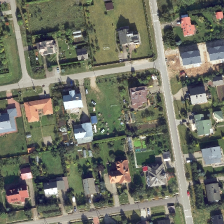

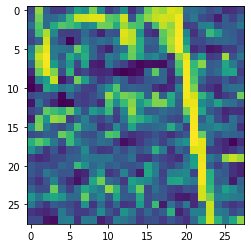

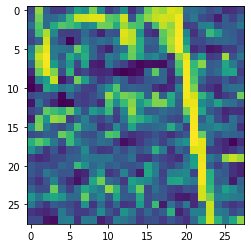

(224, 224, 3)


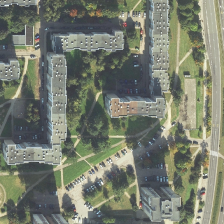

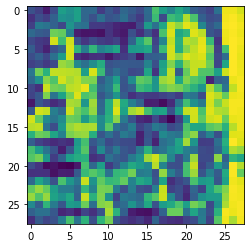

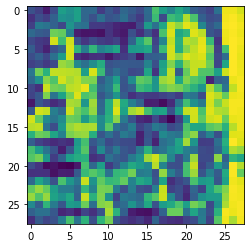

(224, 224, 3)


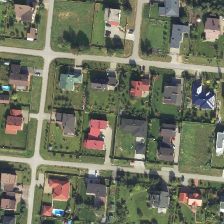

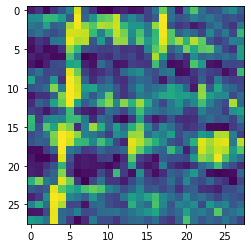

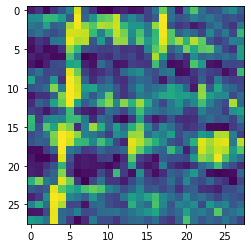

(224, 224, 3)


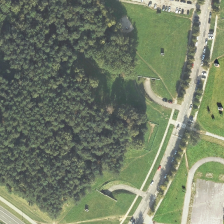

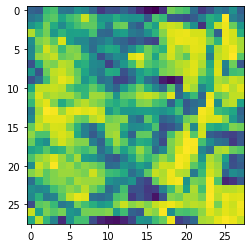

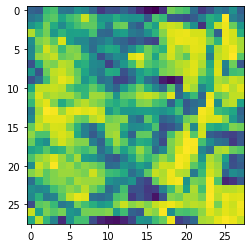

(224, 224, 3)


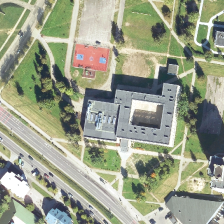

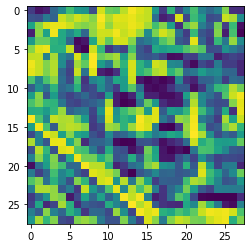

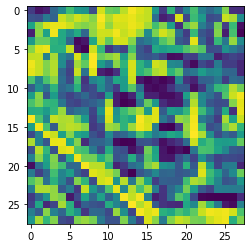

(224, 224, 3)


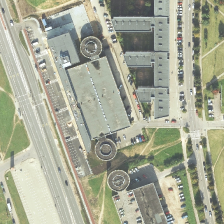

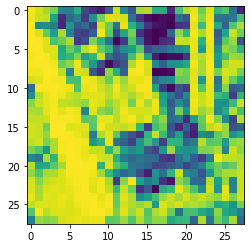

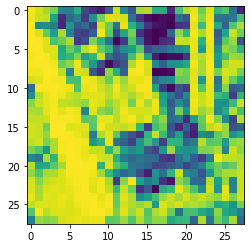

(224, 224, 3)


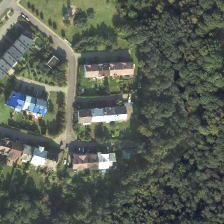

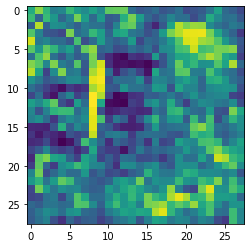

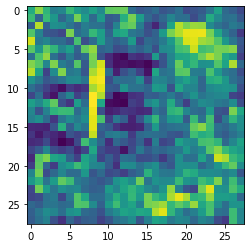

(224, 224, 3)


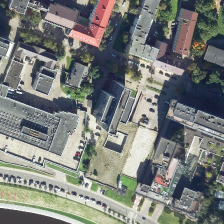

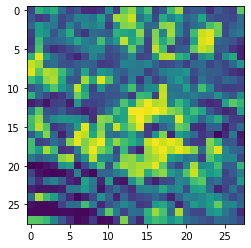

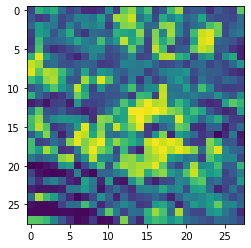

(224, 224, 3)


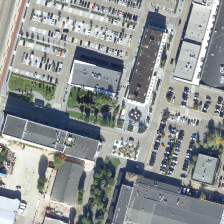

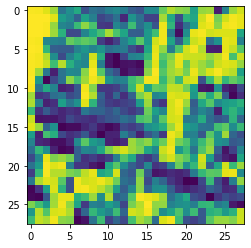

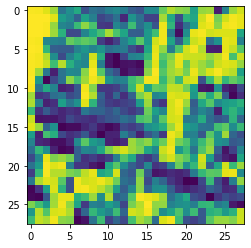

(224, 224, 3)


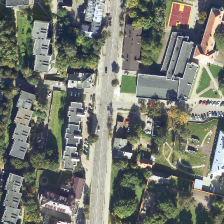

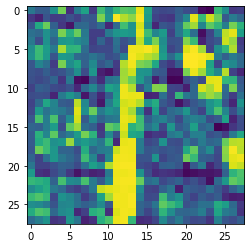

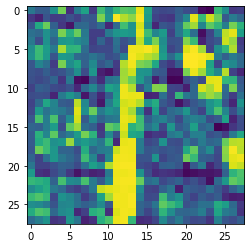

In [51]:
model = model_builder.create_model(True)

for sample in stats.sample_triplets:
    anchor = Image.fromarray(sample.anchor.image)
    print(sample.anchor.image.shape)
    display(anchor)

    plt.imshow(sample.anchor.embedding[:,:,0])
    plt.show()

    result = model.predict(np.array([sample.anchor.image]))

    plt.imshow(result[0,:,:,0])
    plt.show()


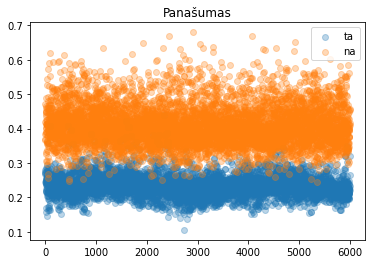

Saving sampled data..........


In [7]:
# training_saver = TrainingSaver(_experiment_folder(model_builder))
# training_saver.save(stats)

In [44]:
def get_index_choices():
    index_choices_folder = "Experiments/runtime_files/training_samples"
    os.makedirs(index_choices_folder, exist_ok=True)

    index_choices_path = f"{index_choices_folder}/indexes-tc{10290}-s{10}.npy"
    if os.path.isfile(index_choices_path):
        return np.array(sorted(np.load(index_choices_path)))

    index_choices = np.random.choice(10290, 10, replace=False)
    np.save(index_choices_path, index_choices)

    return np.array(sorted(index_choices))

In [45]:
print(get_index_choices())
print(get_index_choices())

[  76 2286 3311 3583 3795 4431 6080 6946 7792 8818]
[  76 2286 3311 3583 3795 4431 6080 6946 7792 8818]


In [46]:
def fetch_images_from_dataset():
    image_list = []

    index = 0
    for test_image, _ in training_config.test_triplet().as_numpy_iterator():
        if index in get_index_choices():
            image_list.append(test_image)

        index += 1

    return np.array(image_list)

(10, 3, 224, 224, 3)


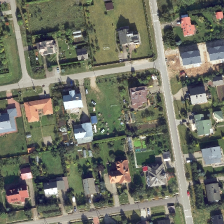

In [47]:
images = fetch_images_from_dataset()
print(images.shape)

display(Image.fromarray(images[0][0]))

In [48]:
mock = np.array(list(range(0, 10290)))
mock_picked = mock[get_index_choices()]
print(mock_picked)

[  76 2286 3311 3583 3795 4431 6080 6946 7792 8818]
